In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold
import operator
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading in the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# observing the number of rows and columns
df.shape

(7043, 21)

In [4]:
# observing data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Initializing lists to store continuous and categorical features
cat_var = []
cont_var = []

# Appending to the lists depending on data type
for i in range(0,df.shape[1]):
    if df.iloc[:,i].dtype == 'float64' or df.iloc[:,i].dtype == 'int64':
        cont_var.append(df.columns[i])
    else:
        cat_var.append(df.columns[i]) 

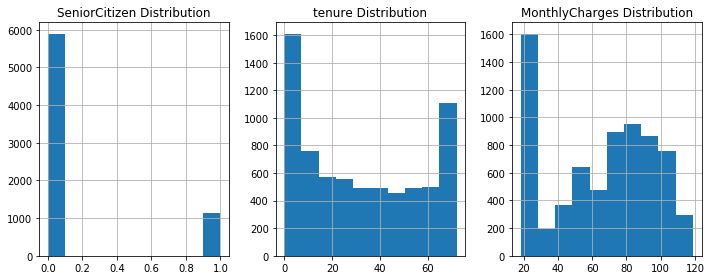

In [6]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(10,4))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()
    plt.show()

draw_histograms(df.loc[:,cont_var],df.loc[:,cont_var].columns,1,3)

### Observations
 - Taking all the features that have data type int64 and float64, we observe that Seniior Citizen is actually a categorical variable that is one hot encoded
 - Tenure and Monthly charges are the only continuous variables in the dataset

In [7]:
# converting non-continuous features to object data type
non_cont_var = ['SeniorCitizen']

# updating the continuous and categorical lists
for i in range(0,len(non_cont_var)):
    df.loc[:,non_cont_var[i]] = df.loc[:,non_cont_var[i]].astype(object)
    cat_var.append(non_cont_var[i])
    if non_cont_var[i] in cont_var: cont_var.remove(non_cont_var[i])
        
# updating continuous list to separate the target variable
if 'Churn' in cat_var: cat_var.remove('Churn')
    
# converting churn to 0,1
df['Churn'] = df['Churn'].apply(lambda x: 0 if x.strip()=='No' else 1)

In [8]:
# creating the train test splits from the data
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,cont_var+cat_var],df['Churn'],random_state=42)

In [9]:
# initializing a continuous transformer
cont_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

# initializing a categorical transformer
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# initializing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', cont_transformer, cont_var),
        ('cat', cat_transformer, cat_var)])

# appending classifiers and preprocessing pipelines
logit = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

linear_sv = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearSVC())])

n_cent = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', NearestCentroid())])

model_name = ['Logistic R','Linear SVC','Nearest Centroid']

In [10]:
# Calculating cross validation scores for each
model_scores = []
model_scores.append(np.mean(cross_val_score(logit, X_train, y_train, cv = 5)))
model_scores.append(np.mean(cross_val_score(linear_sv, X_train, y_train, cv = 5)))
model_scores.append(np.mean(cross_val_score(n_cent, X_train, y_train, cv = 5)))

In [11]:
# initializing a continuous transformer
cont_transformer_std = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# initializing column transformer
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', cont_transformer_std, cont_var),
        ('cat', cat_transformer, cat_var)])

logit_std = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('classifier', LogisticRegression())])

linear_sv_std = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('classifier', LinearSVC())])

n_cent_std = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('classifier', NearestCentroid())])

model_name_std = ['Logistic R','Linear SVC','Nearest Centroid']

In [12]:
# Calculating cross validation scores for each
model_scores_std = []
model_scores_std.append(np.mean(cross_val_score(logit_std, X_train, y_train, cv = 5)))
model_scores_std.append(np.mean(cross_val_score(linear_sv_std, X_train, y_train, cv = 5)))
model_scores_std.append(np.mean(cross_val_score(n_cent_std, X_train, y_train, cv = 5)))

In [13]:
print("Without Standardization")
for i in range(0,3):
    print("The score of %s is %f"% (model_name[i],model_scores[i]))

print("With Standardization")
for i in range(0,3):
    print("The score of %s is %f"% (model_name_std[i],model_scores_std[i]))

Without Standardization
The score of Logistic R is 0.801777
The score of Linear SVC is 0.728155
The score of Nearest Centroid is 0.711663
With Standardization
The score of Logistic R is 0.801399
The score of Linear SVC is 0.799696
The score of Nearest Centroid is 0.717342


Text(0.5,1,'R^2 With Standardization')

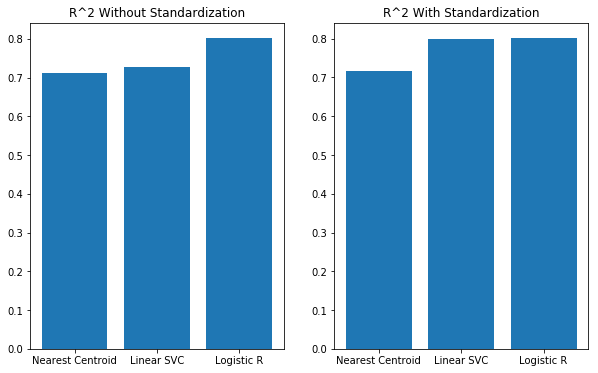

In [14]:
model_name = [x for _,x in sorted(zip(model_scores,model_name))]
model_scores = sorted(model_scores)

model_name_std = [x for _,x in sorted(zip(model_scores_std,model_name_std))]
model_scores_std = sorted(model_scores_std)

fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(1,2,1)
ax.bar(model_name, model_scores)
ax.set_title("R^2 Without Standardization")

ax=fig.add_subplot(1,2,2)
ax.bar(model_name_std, model_scores_std)
ax.set_title("R^2 With Standardization")

### Observations
 - We observe that with standardization, Logistic Regression continues to produce the best R^2 but the R^2 of Linear SVC improves and it's value almost reaches that of the logistic regression model

In [15]:
# parameter to tune
l_param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
svc_param_grid = {'classifier__C':np.arange(0.01,100,10)}
nc_param_grid = {'classifier__metric':['euclidean','manhattan']}

In [16]:
# performing gridsearch for each model
l_grid = GridSearchCV(logit_std, l_param_grid, cv=5)
svc_grid = GridSearchCV(linear_sv_std, svc_param_grid, cv=5)
nc_grid = GridSearchCV(n_cent_std, nc_param_grid, cv=5)

In [17]:
# fitting all the models
l_grid.fit(X_train, y_train)
print("Logit Best cross-validation score: {:.4f}".format(l_grid.best_score_))
print("Logit Best parameters: ", l_grid.best_params_)


svc_grid.fit(X_train, y_train)
print("SVC Best cross-validation score: {:.4f}".format(svc_grid.best_score_))
print("SVC Best parameters: ", svc_grid.best_params_)


nc_grid.fit(X_train, y_train)
print("NC Best cross-validation score: {:.4f}".format(nc_grid.best_score_))
print("NC Best parameters: ", nc_grid.best_params_)

Logit Best cross-validation score: 0.8029
Logit Best parameters:  {'classifier__C': 0.01}
SVC Best cross-validation score: 0.8012
SVC Best parameters:  {'classifier__C': 0.01}
NC Best cross-validation score: 0.7173
NC Best parameters:  {'classifier__metric': 'euclidean'}


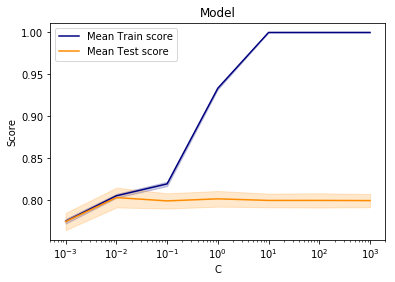

In [18]:
# Logistic validation score dependence 


alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_scores_mean = l_grid.cv_results_["mean_train_score"]
train_scores_std = l_grid.cv_results_["std_train_score"]
test_scores_mean = l_grid.cv_results_["mean_test_score"]
test_scores_std = l_grid.cv_results_["std_test_score"]

plt.figure()
plt.title('Model')
plt.xlabel('C')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

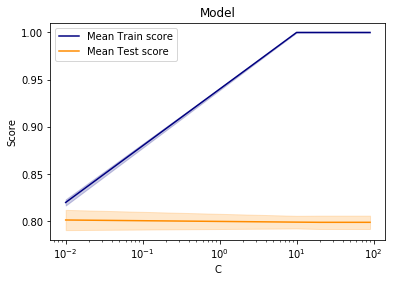

In [19]:
# Linear SvC validation score dependence 


alphas = np.arange(0.01,100,10)

train_scores_mean = svc_grid.cv_results_["mean_train_score"]
train_scores_std = svc_grid.cv_results_["std_train_score"]
test_scores_mean = svc_grid.cv_results_["mean_test_score"]
test_scores_std = svc_grid.cv_results_["std_test_score"]

plt.figure()
plt.title('Model')
plt.xlabel('C')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

### Observations
 - We observe that after gridsearch, there is minor improvement in the logistic regression model and the Linear SVC. No change is observed in the Nearest Centroid model as the default euclidean metric itself is executed

In [20]:
# Calculating cross validation scores with kfold with shuffling
kfold = KFold(n_splits=5,shuffle= True, random_state=42)
model_scores_42 = []
model_scores_42.append(np.mean(cross_val_score(logit_std, X_train, y_train, cv = kfold)))
model_scores_42.append(np.mean(cross_val_score(linear_sv_std, X_train, y_train, cv = kfold)))
model_scores_42.append(np.mean(cross_val_score(n_cent_std, X_train, y_train, cv = kfold)))

In [21]:
kfold = KFold(n_splits=5,shuffle= True, random_state=64)
model_scores_64 = []
model_scores_64.append(np.mean(cross_val_score(logit_std, X_train, y_train, cv = kfold)))
model_scores_64.append(np.mean(cross_val_score(linear_sv_std, X_train, y_train, cv = kfold)))
model_scores_64.append(np.mean(cross_val_score(n_cent_std, X_train, y_train, cv = kfold)))

Text(0.5,1,'K Fold with random state 64')

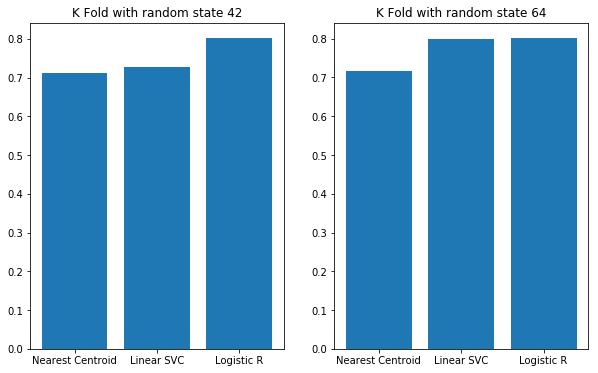

In [22]:
model_name_42 = [x for _,x in sorted(zip(model_scores,model_name))]
model_scores_42 = sorted(model_scores)

model_name_64 = [x for _,x in sorted(zip(model_scores_std,model_name_std))]
model_scores_64 = sorted(model_scores_std)

fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(1,2,1)
ax.bar(model_name_42, model_scores_42)
ax.set_title("K Fold with random state 42")

ax=fig.add_subplot(1,2,2)
ax.bar(model_name_64, model_scores_64)
ax.set_title("K Fold with random state 64")

In [23]:
print("K Fold with random state 42")
for i in range(0,3):
    print("The score of %s is %f"% (model_name_42[i],model_scores_42[i]))

print("K Fold with random state 64")
for i in range(0,3):
    print("The score of %s is %f"% (model_name_64[i],model_scores_64[i]))

K Fold with random state 42
The score of Nearest Centroid is 0.711663
The score of Linear SVC is 0.728155
The score of Logistic R is 0.801777
K Fold with random state 64
The score of Nearest Centroid is 0.717342
The score of Linear SVC is 0.799696
The score of Logistic R is 0.801399


### Observations
 - Yes they change. We observe an increase in the score of the Linear SVC when the random seed of the Kfold with shuffle is change from 42 to 64

In [24]:
# creating the train test splits from the data
X_train_64, X_test_64, y_train_64, y_test_64 = train_test_split(df.loc[:,cont_var+cat_var],df['Churn'],random_state=64)

In [25]:
# Calculating cross validation scores with kfold with shuffling
kfold = KFold(n_splits=5,shuffle= True, random_state=42)
model_scores_42_64 = []
model_scores_42_64.append(np.mean(cross_val_score(logit_std, X_train_64, y_train_64, cv = kfold)))
model_scores_42_64.append(np.mean(cross_val_score(linear_sv_std, X_train_64, y_train_64, cv = kfold)))
model_scores_42_64.append(np.mean(cross_val_score(n_cent_std, X_train_64, y_train_64, cv = kfold)))

Text(0.5,1,'K Fold with random state 64')

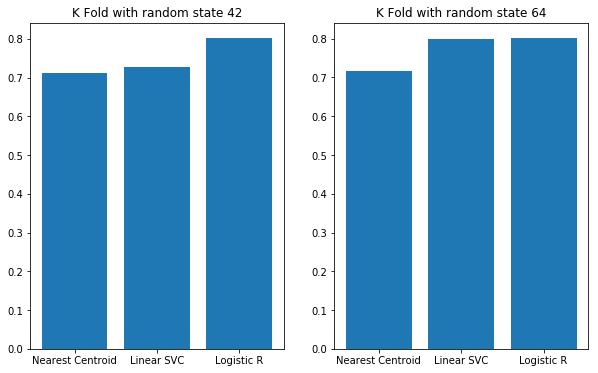

In [26]:
model_name_42 = [x for _,x in sorted(zip(model_scores,model_name))]
model_scores_42 = sorted(model_scores)

model_name_42_64 = [x for _,x in sorted(zip(model_scores_std,model_name_std))]
model_scores_42_64 = sorted(model_scores_std)

fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(1,2,1)
ax.bar(model_name_42, model_scores_42)
ax.set_title("K Fold with random state 42")

ax=fig.add_subplot(1,2,2)
ax.bar(model_name_42_64, model_scores_42_64)
ax.set_title("K Fold with random state 64")

In [27]:
print("Train_Test_Split with random state 42")
for i in range(0,3):
    print("The score of %s is %f"% (model_name_42[i],model_scores_42[i]))

print("Train_Test_Split with random state 64")
for i in range(0,3):
    print("The score of %s is %f"% (model_name_42_64[i],model_scores_42_64[i]))

Train_Test_Split with random state 42
The score of Nearest Centroid is 0.711663
The score of Linear SVC is 0.728155
The score of Logistic R is 0.801777
Train_Test_Split with random state 64
The score of Nearest Centroid is 0.717342
The score of Linear SVC is 0.799696
The score of Logistic R is 0.801399


### Observations
 - Yes they change. We observe a similar increase in the score of the Linear SVC when the random seed of the train_test_split with shuffle is change from 42 to 64

In [28]:
# Training new models based on gridsearch parameters

logit_final = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('classifier', LogisticRegression(C=0.1))])

svc_final = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('classifier', LinearSVC(C=0.1))])

n_cent_final = Pipeline(steps=[('preprocessor', preprocessor_std),
                      ('classifier', NearestCentroid(metric='euclidean'))])


logit_final.fit(X_train,y_train)
svc_final.fit(X_train,y_train)
n_cent_final.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...', 'SeniorCitizen'])])), ('classifier', NearestCentroid(metric='euclidean', shrink_threshold=None))])

In [29]:
print("The final score of the logistic regression model is: %f" %logit_final.score(X_test,y_test))
print("The final score of the linear svc model is: %f" %svc_final.score(X_test,y_test))
print("The final score of the nearest centroid model is: %f" %n_cent_final.score(X_test,y_test))

The final score of the logistic regression model is: 0.814310
The final score of the linear svc model is: 0.814310
The final score of the nearest centroid model is: 0.741624


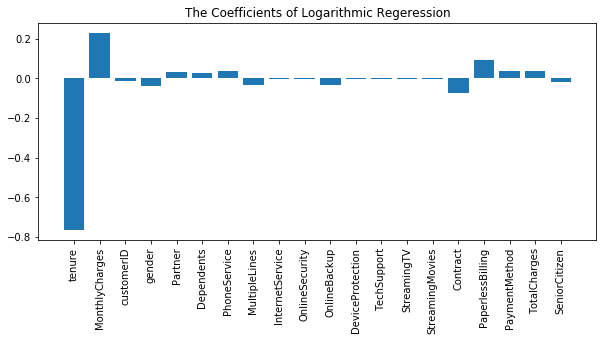

In [30]:
log_coeff=dict(zip(cont_var+cat_var, np.concatenate(logit_final.named_steps.classifier.coef_.reshape(-1,1))))
fig=plt.figure(figsize=(10,4))
plt.bar(range(len(log_coeff)), list(log_coeff.values()), align='center')
plt.xticks(range(len(log_coeff)), list(log_coeff.keys()),rotation=90)
plt.title("The Coefficients of Logarithmic Regeression")
plt.show()

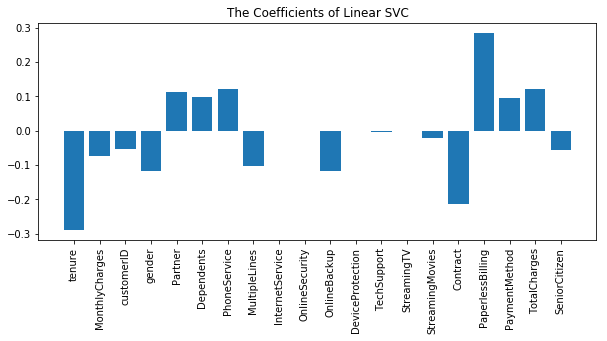

In [31]:
svc_coeff=dict(zip(cont_var+cat_var, np.concatenate(svc_final.named_steps.classifier.coef_.reshape(-1,1))))
fig=plt.figure(figsize=(10,4))
plt.bar(range(len(svc_coeff)), list(svc_coeff.values()), align='center')
plt.xticks(range(len(svc_coeff)), list(svc_coeff.keys()),rotation=90)
plt.title("The Coefficients of Linear SVC")
plt.show()

### Observations
 - We can see from the visualizations of the coefficients of the 2 models that even though they have very similar scores, the feature effects on the predictions vary between the two models